In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**EDA**

In [82]:
df = pd.read_csv('credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Note:
- count plot untuk melihat bagaimana distrubusi
- regresion plot untuk melihat bagaimana hubungan
- pie plot untuk melihat bagaimana presentase
- describe untuk melihat bagaimana rata-rata

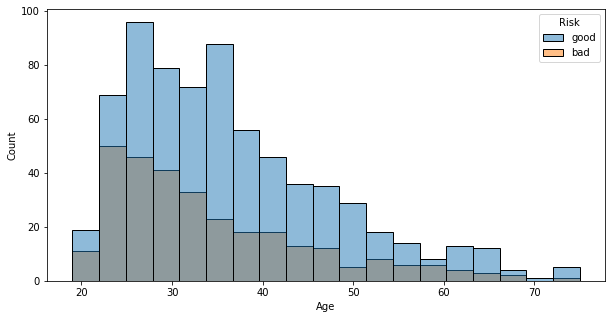

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Risk')
plt.show()

In [84]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [85]:
temp = df[df['Age']>=27]
temp = df[df['Age']<=42]
temp.describe()

,Age,Job,Credit amount,Duration
count,765.00000,765.000000,765.000000,765.000000
mean,30.34902,1.913725,3246.064052,21.230065
std,5.90166,0.633186,2731.387255,12.060358
min,19.00000,0.000000,250.000000,4.000000
25%,26.00000,2.000000,1386.000000,12.000000
50%,30.00000,2.000000,2333.000000,18.000000
75%,35.00000,2.000000,3965.000000,24.000000
max,42.00000,3.000000,18424.000000,72.000000


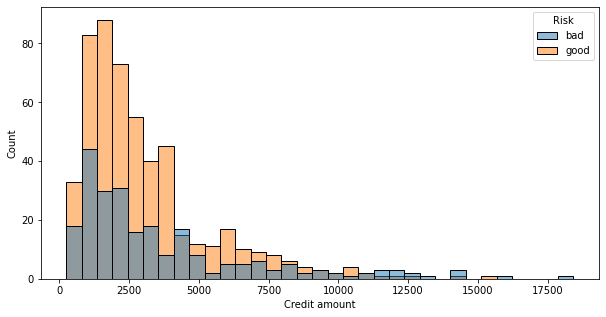

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(data=temp, x='Credit amount', hue='Risk')
plt.show()

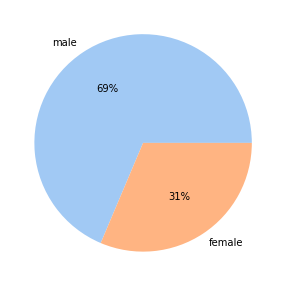

In [87]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')
plt.pie(temp['Risk'].value_counts(), labels= temp['Sex'].value_counts().index, autopct = '%0.0f%%', colors = colors)
plt.show()

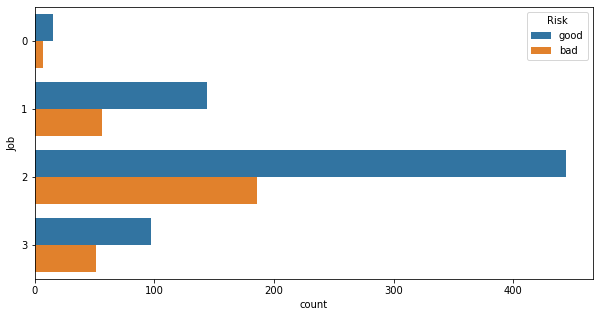

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(y='Job', hue='Risk', data=df)
plt.show()

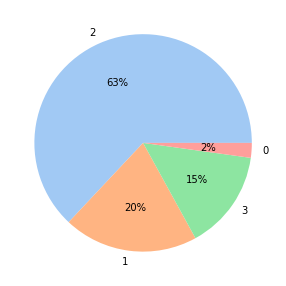

In [89]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')
plt.pie(df['Job'].value_counts(), labels= df['Job'].value_counts().index, autopct = '%0.0f%%', colors = colors)
plt.show()

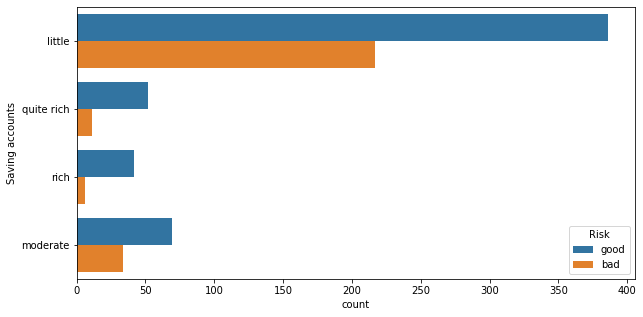

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(y='Saving accounts', hue='Risk', data=df)
plt.show()

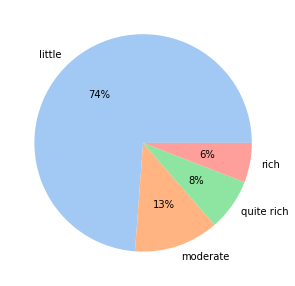

In [91]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')
plt.pie(df['Saving accounts'].value_counts(), labels= df['Saving accounts'].value_counts().index, autopct = '%0.0f%%', colors = colors)
plt.show()

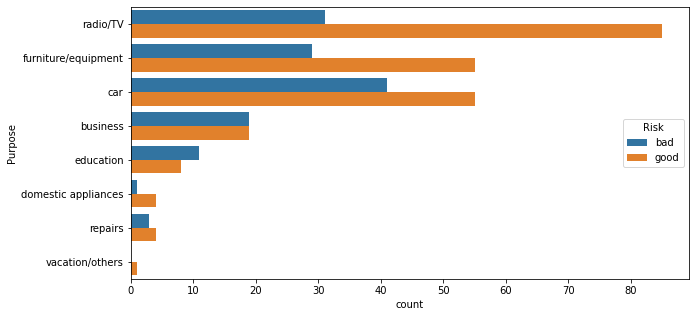

In [92]:
temp = df[df['Job']==2]
temp = temp[temp['Saving accounts']=='little']
plt.figure(figsize=(10,5))
sns.countplot(y='Purpose', hue='Risk', data=temp)
plt.show()

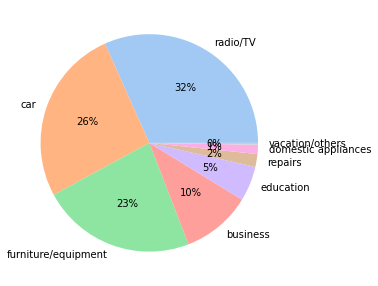

In [93]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')
plt.pie(temp['Purpose'].value_counts(), labels= temp['Purpose'].value_counts().index, autopct = '%0.0f%%', colors = colors)
plt.show()

In [94]:
df.groupby('Purpose')['Risk'].value_counts(normalize=True)*100

Purpose              Risk
business             good    64.948454
                     bad     35.051546
car                  good    68.545994
                     bad     31.454006
domestic appliances  good    66.666667
                     bad     33.333333
education            good    61.016949
                     bad     38.983051
furniture/equipment  good    67.955801
                     bad     32.044199
radio/TV             good    77.857143
                     bad     22.142857
repairs              good    63.636364
                     bad     36.363636
vacation/others      good    58.333333
                     bad     41.666667
Name: Risk, dtype: float64

In [95]:
temp = df[df['Purpose']=='radio/TV']
temp = temp[temp['Risk']=='good']
temp.describe()

,Age,Job,Credit amount,Duration
count,218.000000,218.000000,218.000000,218.000000
mean,35.766055,1.871560,2404.449541,18.564220
std,11.174994,0.561448,2063.318168,11.244989
min,20.000000,0.000000,338.000000,4.000000
25%,27.000000,2.000000,1232.500000,12.000000
50%,33.000000,2.000000,1859.000000,15.000000
75%,42.000000,2.000000,2890.000000,24.000000
max,67.000000,3.000000,15653.000000,60.000000


In [96]:
temp = df[df['Purpose']=='vacation/others']
temp = temp[temp['Risk']=='bad']
temp.describe()

,Age,Job,Credit amount,Duration
count,5.000000,5.0,5.000000,5.000000
mean,40.000000,3.0,11566.000000,36.000000
std,12.103718,0.0,6359.502968,16.970563
min,29.000000,3.0,1358.000000,24.000000
25%,32.000000,3.0,11328.000000,24.000000
50%,39.000000,3.0,11938.000000,24.000000
75%,40.000000,3.0,14782.000000,48.000000
max,60.000000,3.0,18424.000000,60.000000


In [97]:
temp['Saving accounts'].value_counts()

little      3
moderate    1
Name: Saving accounts, dtype: int64

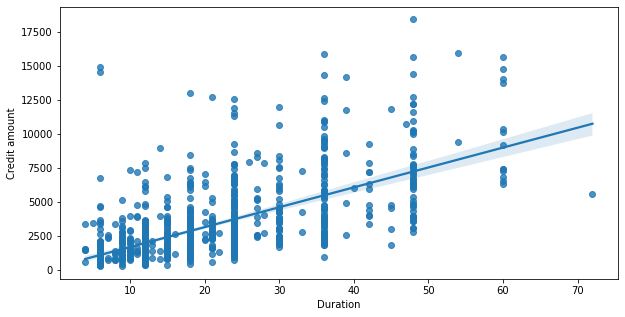

In [98]:
plt.figure(figsize=(10,5))
sns.regplot(y='Credit amount', x='Duration', data=df)
plt.show()

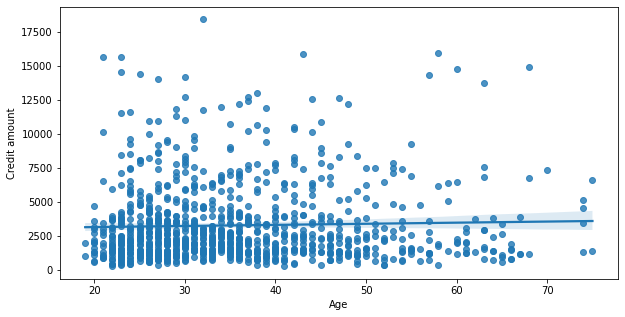

In [99]:
plt.figure(figsize=(10,5))
sns.regplot(y='Credit amount', x='Age', data=df)
plt.show()

**USER SEGMENTATION**

Segmentasi user menggunakan regresi logistik dimana dalam metode tersebut terdapat probabilitas yang nantinya akan digunakan untuk klasifikasi berurut.

In [100]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [101]:
temp = df

In [102]:
temp['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [103]:
temp['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [104]:
temp['Saving accounts'] = temp['Saving accounts'].fillna('little')
temp['Checking account'] = temp['Checking account'].fillna('little')

In [105]:
def conv_sex(x):
  if x == 'male':
    return 0
  else:
    return 1

def conv_housing(x):
  if x == 'own':
    return 0
  elif x == 'free':
    return 1
  else:
    return 2

def conv_save_acc(x):
  if x == 'little':
    return 0
  elif x == 'moderate':
    return 1
  elif x == 'rich':
    return 2
  elif x == 'quite rich':
    return 3
  else:
    return x

def conv_check_acc(x):
  if x == 'little':
    return 0
  elif x == 'moderate':
    return 2
  else:
    return 3

def conv_purpose(x):
  if x == 'radio/TV':
    return 0
  elif x == 'education':
    return 1
  elif x == 'furniture/equipment':
    return 2
  elif x == 'car':
    return 3
  elif x == 'business':
    return 4
  elif x == 'domestic appliances':
    return 5
  else:
    return 6

def conv_risk(x):
  if x == 'bad':
    return 0
  else:
    return 1

In [106]:
temp['Sex'] = temp['Sex'].apply(conv_sex)
temp['Housing'] = temp['Housing'].apply(conv_housing)
temp['Saving accounts'] = temp['Saving accounts'].apply(conv_save_acc)
temp['Checking account'] = temp['Checking account'].apply(conv_check_acc)
temp['Purpose'] = temp['Purpose'].apply(conv_purpose)
temp['Risk'] = temp['Risk'].apply(conv_risk)

In [107]:
temp.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,0,0,1169,6,0,1
1,22,1,2,0,0,2,5951,48,0,0
2,49,0,1,0,0,0,2096,12,1,1
3,45,0,2,1,0,0,7882,42,2,1
4,53,0,2,1,0,0,4870,24,3,0


In [108]:
X = temp.drop(['Risk'], axis=1)
Y = temp['Risk']

In [109]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X, Y)
y_pred = logreg.predict(X)
print(accuracy_score(Y, y_pred))

0.717


Akurasi 71 persen, dimana ini merupakan akurasi yang cukup baik untuk melakukan klasifikasi.

In [110]:
df = pd.read_csv('credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [111]:
array = []
for arr in logreg.predict_proba(X):
  array.append(arr[1])
df['label'] = array

In [112]:
scaler = MinMaxScaler()
df['label'] = scaler.fit_transform(df['label'].to_numpy().reshape(-1,1))

In [113]:
def conv_label(x):
  if x >= 0 and x <= 0.2:
    return 'Grade E'
  elif x > 0.2 and x <= 0.4:
    return 'Grade D'
  elif x > 0.4 and x <= 0.6:
    return 'Grade C'
  elif x > 0.6 and x <= 0.8:
    return 'Grade B'
  else:
    return 'Grade A'

In [114]:
df['label'] = df['label'].apply(conv_label)

In [115]:
df[df['label']=='Grade A'].describe()

,Age,Job,Credit amount,Duration
count,171.000000,171.000000,171.000000,171.000000
mean,47.555556,2.064327,2138.994152,13.391813
std,12.702066,0.643028,1771.078453,6.587309
min,22.000000,0.000000,250.000000,4.000000
25%,36.500000,2.000000,1211.000000,9.000000
50%,47.000000,2.000000,1574.000000,12.000000
75%,57.000000,2.000000,2495.000000,15.000000
max,75.000000,3.000000,14896.000000,36.000000


In [116]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,label
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Grade A
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Grade D
2,49,male,1,own,little,NaN,2096,12,education,good,Grade B
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Grade C
4,53,male,2,free,little,little,4870,24,car,bad,Grade B


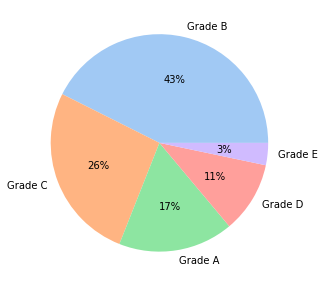

In [117]:
plt.figure(figsize=(10,5))
colors = sns.color_palette('pastel')
plt.pie(df['label'].value_counts(), labels= df['label'].value_counts().index, autopct = '%0.0f%%', colors = colors)
plt.show()

In [118]:
array = []
for arr in logreg.predict_proba(X):
  array.append(arr[1])
temp['label'] = array

In [119]:
scaler = MinMaxScaler()
temp['label'] = scaler.fit_transform(temp['label'].to_numpy().reshape(-1,1))

In [120]:
temp['label'] = temp['label'].apply(conv_label)

In [121]:
temp[temp['label']=='Grade A'].describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,47.555556,0.233918,2.064327,0.181287,1.198830,0.561404,2138.994152,13.391813,1.725146,0.847953
std,12.702066,0.424564,0.643028,0.468917,1.299864,1.029292,1771.078453,6.587309,1.608949,0.360121
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000
25%,36.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1211.000000,9.000000,0.000000,1.000000
50%,47.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1574.000000,12.000000,2.000000,1.000000
75%,57.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2495.000000,15.000000,3.000000,1.000000
max,75.000000,1.000000,3.000000,2.000000,3.000000,3.000000,14896.000000,36.000000,6.000000,1.000000


In [122]:
temp[temp['label']=='Grade B'].describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,35.507042,0.258216,1.880282,0.260563,0.309859,0.685446,2427.981221,16.546948,1.852113,0.753521
std,9.309891,0.438168,0.611448,0.613721,0.711417,1.049201,1764.305706,7.702339,1.542864,0.431467
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,339.000000,4.000000,0.000000,0.000000
25%,29.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1265.750000,12.000000,0.000000,1.000000
50%,34.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1920.500000,15.000000,2.000000,1.000000
75%,40.750000,1.000000,2.000000,0.000000,0.000000,2.000000,3076.250000,24.000000,3.000000,1.000000
max,68.000000,1.000000,3.000000,2.000000,3.000000,3.000000,12749.000000,48.000000,6.000000,1.000000


In [123]:
temp[temp['label']=='Grade C'].describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,31.450758,0.359848,1.905303,0.640152,0.125000,0.814394,4028.049242,24.928030,2.333333,0.651515
std,8.782405,0.480867,0.682850,0.860662,0.439819,1.078489,3058.406863,10.974847,1.589733,0.477395
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,392.000000,4.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1875.250000,15.000000,1.000000,0.000000
50%,29.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3165.000000,24.000000,2.000000,1.000000
75%,36.000000,1.000000,2.000000,2.000000,0.000000,2.000000,5158.750000,36.000000,3.000000,1.000000
max,65.000000,1.000000,3.000000,2.000000,3.000000,3.000000,15857.000000,60.000000,6.000000,1.000000


In [124]:
temp[temp['label']=='Grade D'].describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,28.716981,0.452830,1.858491,1.122642,0.132075,0.849057,5033.330189,32.981132,2.669811,0.471698
std,8.310355,0.500135,0.623946,0.912379,0.340181,1.049194,3328.265058,13.087967,1.432425,0.501570
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,6.000000,0.000000,0.000000
25%,23.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2343.750000,24.000000,2.000000,0.000000
50%,26.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4041.000000,34.500000,3.000000,0.000000
75%,31.000000,1.000000,2.000000,2.000000,0.000000,2.000000,7111.500000,48.000000,3.000000,1.000000
max,60.000000,1.000000,3.000000,2.000000,1.000000,3.000000,14782.000000,60.000000,6.000000,1.000000


In [125]:
temp[temp['label']=='Grade E'].describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,28.515152,0.515152,1.515152,1.090909,0.121212,1.030303,8310.060606,45.060606,3.060606,0.363636
std,7.508833,0.507519,0.870388,0.947485,0.331434,1.015038,4472.775857,14.015481,1.657170,0.488504
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1193.000000,12.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4811.000000,36.000000,3.000000,0.000000
50%,26.000000,1.000000,2.000000,1.000000,0.000000,2.000000,7472.000000,48.000000,3.000000,0.000000
75%,32.000000,1.000000,2.000000,2.000000,0.000000,2.000000,10722.000000,54.000000,4.000000,1.000000
max,58.000000,1.000000,3.000000,2.000000,1.000000,2.000000,18424.000000,72.000000,6.000000,1.000000


**CREDIT RISK PREDICTION MODEL**

In [126]:
df = pd.read_csv('credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [127]:
temp = df

In [128]:
temp['Saving accounts'] = temp['Saving accounts'].fillna('little')
temp['Checking account'] = temp['Checking account'].fillna('little')

In [129]:
temp['Sex'] = temp['Sex'].apply(conv_sex)
temp['Housing'] = temp['Housing'].apply(conv_housing)
temp['Saving accounts'] = temp['Saving accounts'].apply(conv_save_acc)
temp['Checking account'] = temp['Checking account'].apply(conv_check_acc)
temp['Purpose'] = temp['Purpose'].apply(conv_purpose)
temp['Risk'] = temp['Risk'].apply(conv_risk)

In [130]:
X = temp.drop(['Risk'], axis=1)
Y = temp['Risk']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=20)

logistic regression

In [132]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.15      0.24       117
           1       0.67      0.96      0.79       213

    accuracy                           0.67       330
   macro avg       0.66      0.55      0.51       330
weighted avg       0.66      0.67      0.59       330



Decision Tree

In [134]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39       117
           1       0.67      0.71      0.69       213

    accuracy                           0.59       330
   macro avg       0.54      0.54      0.54       330
weighted avg       0.58      0.59      0.58       330



naive bayes

In [136]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39       117
           1       0.69      0.87      0.77       213

    accuracy                           0.67       330
   macro avg       0.63      0.59      0.58       330
weighted avg       0.65      0.67      0.64       330



In [138]:
n_neighbor = [5, 10, 20, 30, 40, 50, 60]
for i in n_neighbor:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(str(i), " : ",f1_score(y_test, y_pred))

5  :  0.7584830339321357
10  :  0.7649402390438246
20  :  0.7748091603053435
30  :  0.783427495291902
40  :  0.7857142857142857
50  :  0.7857142857142857
60  :  0.7845303867403315


In [139]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.06      0.11       117
           1       0.65      0.98      0.78       213

    accuracy                           0.65       330
   macro avg       0.62      0.52      0.45       330
weighted avg       0.63      0.65      0.54       330



metode yang cukup baik untuk menentukan label bad adalah decison tree dan naive bayes.

Check overfitting or underfitting

logistic regression

In [141]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.15      0.24       117
           1       0.67      0.96      0.79       213

    accuracy                           0.67       330
   macro avg       0.66      0.55      0.51       330
weighted avg       0.66      0.67      0.59       330



In [142]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_test, y_test)
y_pred = logreg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36       183
           1       0.77      0.87      0.81       487

    accuracy                           0.71       670
   macro avg       0.61      0.58      0.59       670
weighted avg       0.68      0.71      0.69       670



In [143]:
diff_logreg = []
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 
y_pred_tests = []
y_pred_trains = []
y_mid = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=20)
  logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
  logreg.fit(X_train, y_train)
  y_pred_test = logreg.predict(X_test)
  y_pred_tests.append(f1_score(y_pred_test, y_test))
  logreg.fit(X_test, y_test)
  y_pred_train = logreg.predict(X_train)
  y_pred_trains.append(f1_score(y_pred_train, y_train))
  y_mid.append((f1_score(y_pred_test, y_test) + f1_score(y_pred_train, y_train))/2)
  diff_logreg.append(abs(f1_score(y_pred_test, y_test) - f1_score(y_pred_train, y_train)))

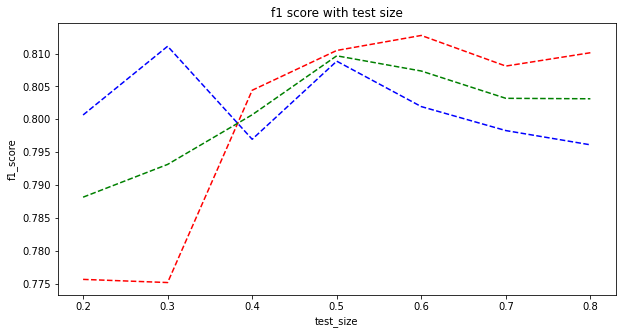

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, y_pred_tests, color='red', linestyle='dashed')
plt.plot(test_sizes, y_pred_trains, color='blue', linestyle='dashed')
plt.plot(test_sizes, y_mid, color='green', linestyle='dashed')
plt.title('f1 score with test size')
plt.xlabel('test_size')
plt.ylabel('f1_score')
plt.show()

decision tree

In [145]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.38      0.37       239
           1       0.73      0.72      0.73       561

    accuracy                           0.62       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.62      0.62      0.62       800



In [146]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_test, y_test)
y_pred = dtree.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38        61
           1       0.72      0.66      0.69       139

    accuracy                           0.58       200
   macro avg       0.53      0.54      0.53       200
weighted avg       0.61      0.58      0.59       200



In [147]:
diff_dtree = []
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 
y_pred_tests = []
y_pred_trains = []
y_mid = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=20)
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train, y_train)
  y_pred_test = dtree.predict(X_test)
  y_pred_tests.append(f1_score(y_pred_test, y_test))
  dtree.fit(X_test, y_test)
  y_pred_train = dtree.predict(X_train)
  y_pred_trains.append(f1_score(y_pred_train, y_train))
  y_mid.append((f1_score(y_pred_test, y_test) + f1_score(y_pred_train, y_train))/2)
  diff_dtree.append(abs(f1_score(y_pred_test, y_test) - f1_score(y_pred_train, y_train)))

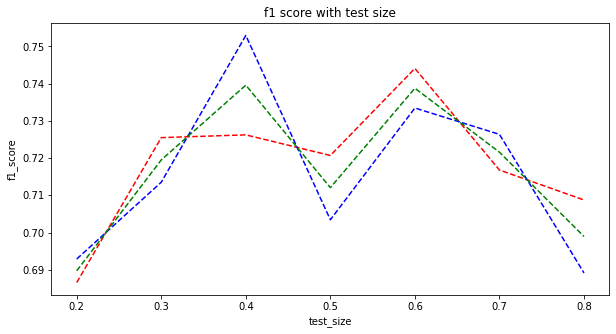

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, y_pred_tests, color='red', linestyle='dashed')
plt.plot(test_sizes, y_pred_trains, color='blue', linestyle='dashed')
plt.plot(test_sizes, y_mid, color='green', linestyle='dashed')
plt.title('f1 score with test size')
plt.xlabel('test_size')
plt.ylabel('f1_score')
plt.show()

naive bayes

In [149]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.24      0.32       239
           1       0.73      0.89      0.81       561

    accuracy                           0.70       800
   macro avg       0.61      0.57      0.56       800
weighted avg       0.66      0.70      0.66       800



In [150]:
nb = GaussianNB()
nb.fit(X_test, y_test)
y_pred = nb.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.36      0.41        61
           1       0.75      0.83      0.78       139

    accuracy                           0.69       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.66      0.69      0.67       200



In [151]:
diff_nb = []
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 
y_pred_tests = []
y_pred_trains = []
y_mid = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=20)
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  y_pred_test = nb.predict(X_test)
  y_pred_tests.append(f1_score(y_pred_test, y_test))
  nb.fit(X_test, y_test)
  y_pred_train = nb.predict(X_train)
  y_pred_trains.append(f1_score(y_pred_train, y_train))
  y_mid.append((f1_score(y_pred_test, y_test) + f1_score(y_pred_train, y_train))/2)
  diff_nb.append(abs(f1_score(y_pred_test, y_test) - f1_score(y_pred_train, y_train)))

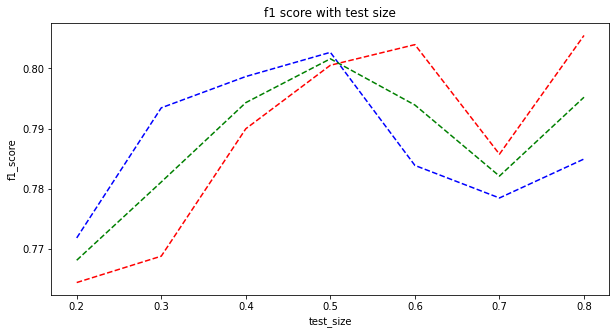

In [152]:
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, y_pred_tests, color='red', linestyle='dashed')
plt.plot(test_sizes, y_pred_trains, color='blue', linestyle='dashed')
plt.plot(test_sizes, y_mid, color='green', linestyle='dashed')
plt.title('f1 score with test size')
plt.xlabel('test_size')
plt.ylabel('f1_score')
plt.show()

K-nearest neighbor

In [153]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.06      0.11       239
           1       0.71      0.98      0.82       561

    accuracy                           0.70       800
   macro avg       0.63      0.52      0.47       800
weighted avg       0.66      0.70      0.61       800



In [154]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.15      0.25        61
           1       0.73      0.99      0.84       139

    accuracy                           0.73       200
   macro avg       0.81      0.57      0.55       200
weighted avg       0.78      0.73      0.66       200



In [155]:
diff_knn = []
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 
y_pred_tests = []
y_pred_trains = []
y_mid = []
for i in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=20)
  knn = KNeighborsClassifier(n_neighbors=30)
  knn.fit(X_train, y_train)
  y_pred_test = knn.predict(X_test)
  y_pred_tests.append(f1_score(y_pred_test, y_test))
  knn.fit(X_test, y_test)
  y_pred_train = knn.predict(X_train)
  y_pred_trains.append(f1_score(y_pred_train, y_train))
  y_mid.append((f1_score(y_pred_test, y_test) + f1_score(y_pred_train, y_train))/2)
  diff_knn.append(abs(f1_score(y_pred_test, y_test) - f1_score(y_pred_train, y_train)))

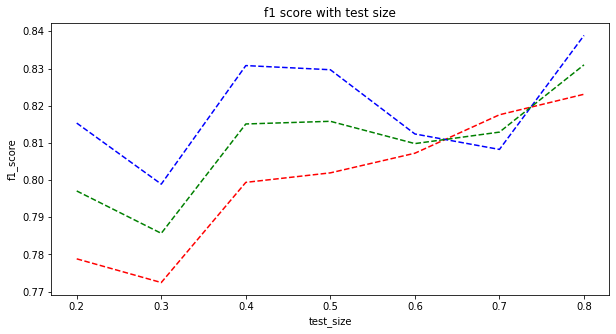

In [156]:
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, y_pred_tests, color='red', linestyle='dashed')
plt.plot(test_sizes, y_pred_trains, color='blue', linestyle='dashed')
plt.plot(test_sizes, y_mid, color='green', linestyle='dashed')
plt.title('f1 score with test size')
plt.xlabel('test_size')
plt.ylabel('f1_score')
plt.show()

In [157]:
print('minimum error of logreg : ', min(diff_logreg))
print('average error of logreg : ', sum(diff_logreg)/len(diff_logreg))
print('maximum error of logreg : ', max(diff_logreg))
print('------------------------------------------------------------')
print('minimum error of dtree : ', min(diff_dtree))
print('average error of dtree : ', sum(diff_dtree)/len(diff_dtree))
print('maximum error of dtree : ', max(diff_dtree))
print('------------------------------------------------------------')
print('minimum error of nb : ', min(diff_nb))
print('average error of nb : ', sum(diff_nb)/len(diff_nb))
print('maximum error of nb : ', max(diff_nb))
print('------------------------------------------------------------')
print('minimum error of knn : ', min(diff_knn))
print('average error of knn : ', sum(diff_knn)/len(diff_knn))
print('maximum error of knn : ', max(diff_knn))

minimum error of logreg :  0.0016311626655080014
average error of logreg :  0.014958063760560318
maximum error of logreg :  0.03595051153937667
------------------------------------------------------------
minimum error of dtree :  0.006316730951981708
average error of dtree :  0.014582627559367662
maximum error of dtree :  0.026705435025721425
------------------------------------------------------------
minimum error of nb :  0.0021417322834644814
average error of nb :  0.012935569362384602
maximum error of nb :  0.02458910086894983
------------------------------------------------------------
minimum error of knn :  0.005174185112543084
average error of knn :  0.0217792745669807
maximum error of knn :  0.03652026384683993


I choose naive bayes cause this method is good predict for "bad" and "good" label and this method can be use with all condition.

In [158]:
nb = GaussianNB()
nb.fit(X, Y)
y_pred = nb.predict(X)
print(accuracy_score(Y, y_pred))

0.7


In [159]:
df['predict'] = y_pred
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,predict
0,67,0,2,0,0,0,1169,6,0,1,1
1,22,1,2,0,0,2,5951,48,0,0,0
2,49,0,1,0,0,0,2096,12,1,1,1
3,45,0,2,1,0,0,7882,42,2,1,0
4,53,0,2,1,0,0,4870,24,3,0,1
